# 1.Importation des Librairies

In [1]:
# 1. Importation des librairies
import numpy as np
import pandas as pd

In [1]:
# 1. Importation des librairies
import numpy as np
import pandas as pd

# 2. Chargement des donnees

In [3]:
# 2. Chargement des donnees
data = pd.read_csv('Data/studentscores.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des donnees

In [15]:
# 3. Analyse des donnees
data.isnull() #verification des donnees manquantes

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [8]:
data['Hours'].max()

9.2

In [9]:
data['Hours'].min()

1.1

In [10]:
print(data['Hours'].max())

9.2


In [12]:
print(data['Scores'].max())

95


In [13]:
print("Max Scores :",data['Scores'].max())

Max Scores : 95


In [14]:
print("Min Scores :",data['Scores'].min())

Min Scores : 17


# 4. Division des donnees

In [28]:
data.head(4)
# on affiche les 4 premiere lignes. la colonne hours et independante et la colonne est dependante

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


 # Variables Indep et Variables Dep

In [21]:
X = data.iloc[ : , :-1].values
Y = data.iloc[ : , -1]. values

In [29]:
X
#x est un taleau a deux dimension et y est un taleau a une dimension


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [23]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# 4.1 Separation de donnees : Train et Test

In [24]:
#X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [30]:
train_test_split(X, Y, test_size = 0.25, random_state= 40)
#le train prend 17 pourcent et le test 25

[array([[3.2],
        [5.9],
        [1.9],
        [3.5],
        [8.3],
        [2.5],
        [3.8],
        [2.7],
        [2.5],
        [2.7],
        [7.7],
        [6.9],
        [4.5],
        [5.1],
        [6.1],
        [1.5],
        [5.5],
        [9.2]]),
 array([[8.9],
        [7.8],
        [1.1],
        [7.4],
        [3.3],
        [8.5],
        [4.8]]),
 array([27, 62, 24, 30, 81, 30, 35, 30, 21, 25, 85, 76, 41, 47, 67, 20, 60,
        88], dtype=int64),
 array([95, 86, 17, 69, 42, 75, 54], dtype=int64)]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state= 40)

In [27]:
print("X-train Shape:",X_train.shape)
print("X-test Shape:",X_test.shape)
print("y-train Shape:",y_train.shape)
print("y-test Shape:",y_test.shape)


X-train Shape: (18, 1)
X-test Shape: (7, 1)
y-train Shape: (18,)
y-test Shape: (7,)


# 5. Construire le modele

In [31]:
# Importer l'algorithme de la Regression Linear
from sklearn.linear_model import LinearRegression

In [32]:
modele_lineaire = LinearRegression()

In [34]:
# Entrainement du modele on utilise le x et y train
modele_lineaire.fit(X_train,y_train)

LinearRegression()

In [37]:
# Faire la prediction on utilise le x_test
y_scores_predits = modele_lineaire.predict(X_test)

In [38]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [39]:
y_test

array([95, 86, 17, 69, 42, 75, 54], dtype=int64)

In [40]:
print(y_test)

[95 86 17 69 42 75 54]


In [42]:
resultats= pd.DataFrame(y_test ,y_scores_predits)

In [43]:
resultats

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [44]:
#Evaluation du modele

from sklearn.metrics import mean_squared_error, r2_score

In [51]:
print("MSE de la Regression Lineaire:", mean_squared_error(y_test,y_scores_predits))
# doit etre superieure


MSE de la Regression Lineaire: 51.90159659147336


In [50]:
print("R2 Score de la regression lineaire:",r2_score(y_test,y_scores_predits))
#doit etre compris entre 0 et 1

R2 Score de la regression lineaire: 0.9168569951293908


# 6. Visualisation de Resultats

In [52]:
import matplotlib.pyplot as plt

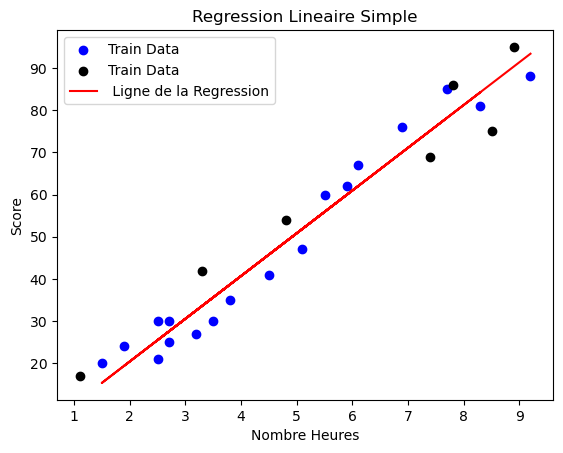

In [58]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Train Data')
#plt.plot(X_test, y_scores_predits,color='red', label='Ligne de la Regression')  on compare avec le xtest  parce que on a predit avec les donner de xtest ou
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label= ' Ligne de la Regression') #on predit et affiche directement
plt.xlabel('Nombre Heures')
plt.ylabel('Score')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

# 7. Prediction simple

In [62]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [64]:
resultats= pd.DataFrame({'y-score-reel': y_test ,'y-scores-predits':y_scores_predits})
resultats

,y-score-reel,y-scores-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [65]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [67]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [60]:
print(modele_lineaire.predict([[2.5]]))

[25.49124]


In [61]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [71]:
difference=( y_test - y_scores_predits)

In [70]:
resultats= pd.DataFrame({'y-score-reel': y_test ,'y-scores-predits':y_scores_predits, 'Difference': difference})
resultats

,y-score-reel,y-scores-predits,Difference
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639
